In [ ]:
# rede neurais mlp -----------------------------------------------------------------------------------------------------------
# multi layer percepton


# redes neurais convolucionais (cnns) -----------------------------------------------------------------------------------------------------------
# achata as matrizes para condensar as informações importantes
# https://adamharley.com/nn_vis/cnn/2d.html
# matriz e transforma em vetor linha
# depende da resolução
# a redução
# camada de convolução e pooling  flatinnug
# detector de caracteristicas
# filtros para destacar as informações https://setosa.io/ev/image-kernels/ (convoluções)
# pooling -> achatar a imagem
#  função de maior informação
# pega onde tem a região de maior concentração
# transforma a matriz em linha
# e faz a rede neural
# multi layer percepton

# redes neurais recorrente -----------------------------------------------------------------------------------------------------------------
# há uma retroalimentação

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist # manuscritos
from keras.models import Sequential # ordem da sequencia da saida
# recalculo do peso dos erros até que o erro seja pequeno
# acuracia precisão sensibilidade
# erro é do lado contrario, calcula a função de perda
# para diminuir o erro
# gradiende descente
from keras.layers import Dense, Flatten, Dropout
# dropout = diminuir overfitting, da pra fazer com o lasso (atribui 0) e o ridge (diminui proximo ao 0)
from tensorflow.keras.utils import to_categorical # 0 e 255 (color) para 0 e 1
# melhor trabalhar com escala de cinza, mesma informação com um número reduzido de informações
from keras.layers import Conv2D, MaxPooling2D # redes neurais CNN 2D, há o 3d mas n vamos trabalhar
# tensorflow é o framework é o deep learning da google, facebook é pytorch, HUAWEI tbm mas é menos utilizadospor conta do embarque americano
from tensorflow.keras.layers import BatchNormalization


(60000, 28, 28)
(60000,)


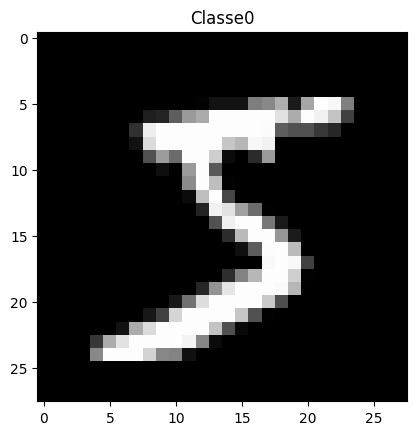

In [ ]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[0], cmap='gray')
plt.title('Classe'  + str(y_treinamento[1]))
print(X_treinamento.shape)
print(y_treinamento.shape)
# 28 x 28 pixels
# saída única
# 60 mil exemplos

In [ ]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1) # valores de 0 255 para 0 a 1 e não sera numeros naturais e sim reais
previsores_testes = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_testes = previsores_testes.astype('float32') / 255
previsores_treinamento = previsores_treinamento.astype('float32') / 255

In [ ]:
classe_treinamento = to_categorical(y_treinamento, 10)
classe_teste = to_categorical(y_teste, 10)
print(classe_treinamento[0])
print(classe_treinamento)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
classificador = Sequential()
# primeira camada
classificador.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
classificador.add(BatchNormalization()) # media proxima de 0 e dp proximo de 1 para ter controle do gradiente, ele não pode "explodir", não pode ser pequeno demora pra chegar tempo de processamento e nem grande, n chega na solução
classificador.add(MaxPooling2D(pool_size=(2,2)))
# segunda camada
classificador.add(Conv2D(32, (3,3), activation = 'relu')) # input shape não se coloca nas demais camdas, apenas na primeira
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
# só coloca o flatten no final
classificador.add(Flatten()) # achatar

In [ ]:
classificador.add(Dense(units = 128, activation = 'relu')) # relu = função de ativação
classificador.add(Dropout(0.2)) # corta arestas sem critério e isso diminui a complexidade, tira overffiting
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento, epochs = 2, batch_size=100, validation_data=(previsores_testes, classe_teste))

Epoch 1/2
600/600 [==============================] - 53s 85ms/step - loss: 1.2052 - accuracy: 0.4957 - val_loss: 0.4777 - val_accuracy: 0.8272
Epoch 2/2
600/600 [==============================] - 55s 91ms/step - loss: 0.3331 - accuracy: 0.8642 - val_loss: 0.2670 - val_accuracy: 0.8761
